In [1]:
import pandas as pd
import numpy as np

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"

In [3]:
raw_data = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


custom_column_names = [
    'Custom_CRIM', 'Custom_ZN', 'Custom_INDUS', 'Custom_CHAS', 'Custom_NOX', 
    'Custom_RM', 'Custom_AGE', 'Custom_DIS', 'Custom_RAD', 'Custom_TAX', 
    'Custom_PTRATIO', 'Custom_B', 'Custom_LSTAT'
]


In [5]:
custom_data = np.hstack([raw_data.values[::2, :], raw_data.values[1::2, :2]])
custom_target = raw_data.values[1::2, 2]
custom_df = pd.DataFrame(custom_data, columns=custom_column_names)
custom_df['Custom_target'] = custom_target

print(custom_df.describe())


       Custom_CRIM   Custom_ZN  Custom_INDUS  Custom_CHAS  Custom_NOX  \
count   506.000000  506.000000    506.000000   506.000000  506.000000   
mean      3.613524   11.363636     11.136779     0.069170    0.554695   
std       8.601545   23.322453      6.860353     0.253994    0.115878   
min       0.006320    0.000000      0.460000     0.000000    0.385000   
25%       0.082045    0.000000      5.190000     0.000000    0.449000   
50%       0.256510    0.000000      9.690000     0.000000    0.538000   
75%       3.677083   12.500000     18.100000     0.000000    0.624000   
max      88.976200  100.000000     27.740000     1.000000    0.871000   

        Custom_RM  Custom_AGE  Custom_DIS  Custom_RAD  Custom_TAX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   
std      0.702617   28.148861    2.105710    8.707259  168.537116   
min      3.561000    2.900000    1.129600    1.000000  187.000000 

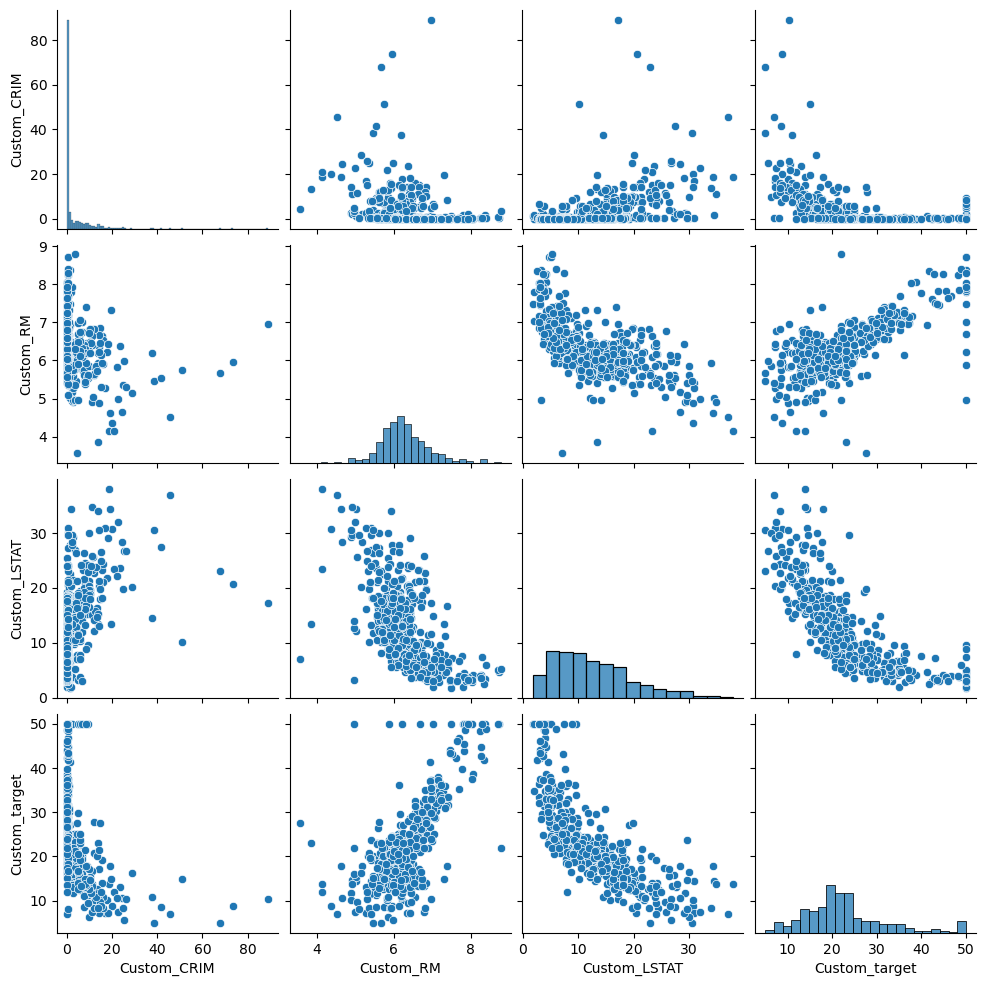

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(custom_df, vars=['Custom_CRIM', 'Custom_RM', 'Custom_LSTAT', 'Custom_target'], kind='scatter')
plt.show()

In [7]:
selected_custom_features = ['Custom_CRIM', 'Custom_RM', 'Custom_LSTAT']

X_custom = custom_df[selected_custom_features]
y_custom = custom_df['Custom_target']

from sklearn.model_selection import train_test_split

X_custom_train, X_custom_test, y_custom_train, y_custom_test = train_test_split(X_custom, y_custom, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LinearRegression

custom_model = LinearRegression()
custom_model.fit(X_custom_train, y_custom_train)


LinearRegression()

Custom-named Mean Squared Error: 32.28233926546234
Custom-named R-squared: 0.5597889830000122


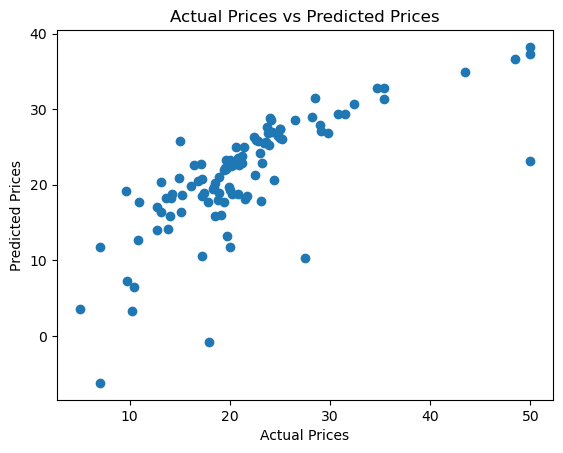

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
y_custom_pred = custom_model.predict(X_custom_test)

#mean squared error (MSE) and R-squared
custom_mse = mean_squared_error(y_custom_test, y_custom_pred)
custom_r2 = r2_score(y_custom_test, y_custom_pred)
print("Custom-named Mean Squared Error:", custom_mse)
print("Custom-named R-squared:", custom_r2)

# Visualize actual vs predicted prices
plt.scatter(y_custom_test, y_custom_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()